In [46]:
#librerías
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import seaborn as sbn
from datetime import datetime as dt

In [147]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:75% }</style>"))

In [47]:
#Lectura de todo el directorio

directory_path = 'D:/Tesis/data_test/full/'
pd.pandas.set_option('display.max_columns', None)

dense = [pd.read_excel(io = filename, sheet_name = None, index_col = 0, usecols = 'A:K', engine = 'openpyxl') for filename in glob('D:/Tesis/data_test/full/*.xlsx')]

In [48]:
#Lectura de la data compacta

df = pd.read_excel('D:/Tesis/data_test/merged/output.xlsx', index_col = 0, usecols = 'A:L', engine = 'openpyxl')

# Este df solo contempla a los pesos iniciales menores a 3.5

In [49]:
df.dtypes

Semana                         int64
Fecha                          int64
Peso                         float64
Incremento                   float64
Ratio                        float64
Factor de conversion acum    float64
Total alimento [USD]         float64
T° min                        object
T° MAX                        object
O2 min                        object
O2 MAX                        object
dtype: object

In [50]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%Y%m%d')

df['Fecha'][0]

Timestamp('2013-03-04 00:00:00')

In [51]:
df['Fecha'][0].date()

datetime.date(2013, 3, 4)

In [52]:
df['Fecha'][0].time()

datetime.time(0, 0)

In [53]:
df['Fecha'].apply(lambda x: x.date())

0        2013-03-04
1        2013-03-11
2        2013-03-18
3        2013-03-25
4        2013-04-01
            ...    
21140    2014-04-28
21141    2014-05-05
21142    2014-05-12
21143    2014-05-19
21144    2014-05-26
Name: Fecha, Length: 21145, dtype: object

In [54]:
df.head()

,Semana,Fecha,Peso,Incremento,Ratio,Factor de conversion acum,Total alimento [USD],T° min,T° MAX,O2 min,O2 MAX
0,1,2013-03-04,3.38,NaN,NaN,0.576750,NaN,"[nan, nan, nan, 30.6, 30.6, 30.0, 29.1]","[nan, nan, nan, 32.1, 31.0, 32.0, 31.3]","[nan, nan, nan, 5.9, 5.4, 5.2, 4.3]","[nan, nan, nan, 7.4, 6.8, 6.7, 8.8]"
1,2,2013-03-11,4.92,1.54,1.4556,0.732102,NaN,"[29.3, 30.5, 30.8, 31.1, 31.2, 30.9, 29.3]","[31.2, 30.6, 32.1, 31.9, 30.5, 32.4, 31.3]","[4.6, 4.6, 3.9, 4.4, 5.3, 5.0, 4.9]","[6.1, 7.6, 6.1, 6.5, 6.4, 7.2, 6.0]"
2,3,2013-03-18,7.03,2.11,1.4289,0.817244,NaN,"[30.6, 30.5, 30.2, 30.8, 31.0, 30.3, 29.8]","[31.3, 31.1, 31.7, 31.2, 31.1, 31.0, 30.0]","[5.8, 5.1, 7.9, 6.5, 5.6, 4.5, 3.7]","[6.8, 7.0, 7.8, 7.7, 7.2, 6.8, 6.5]"
3,4,2013-03-25,8.83,1.80,1.2560,0.889875,NaN,"[27.5, 28.9, 29.8, 29.8, 29.2, 28.6, 28.3]","[30.0, 30.8, 30.9, 30.2, 29.7, 28.9, 29.9]","[3.7, 5.0, 5.7, 5.3, 5.6, 5.2, 5.9]","[6.7, 8.6, 8.4, 8.0, 7.7, 7.7, 9.8]"
4,5,2013-04-01,10.29,1.46,1.1653,1.018967,NaN,"[28.4, 28.6, 28.5, 26.7, 27.3, 27.9, 28.2]","[31.2, 30.4, 29.7, 28.4, 28.7, 28.7, 29.9]","[5.4, 6.0, 5.6, 4.1, 6.4, 7.0, 7.1]","[8.5, 8.6, 7.1, 8.2, 9.6, 8.0, 11.0]"


## Grafica Peso de todas las piscinas vs Semana, de todas las campañas restringida

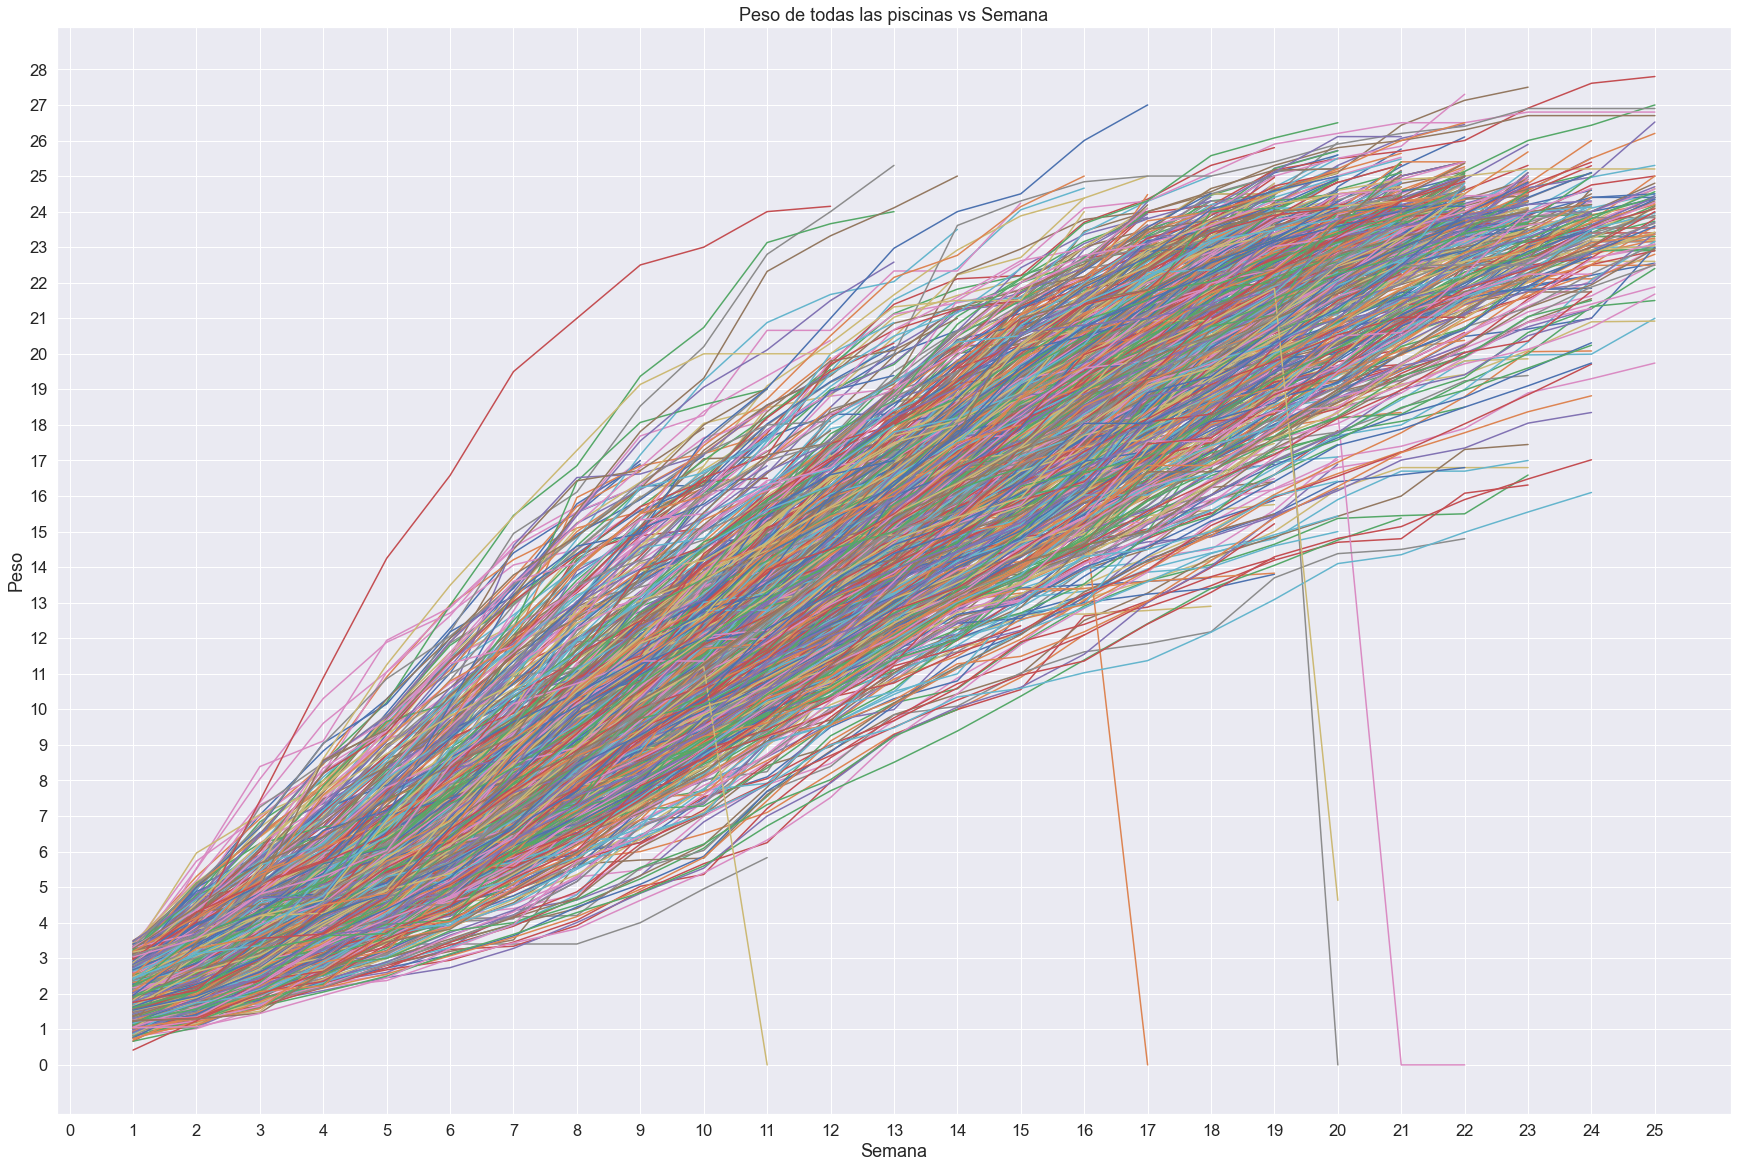

In [55]:
font = {'size' : 22}

plt.rc('font', **font)

plt.figure(figsize=(30,20))

for file in dense:
    for dataframe in file.values():
        if dataframe['Peso'][0] < 3.5:
            dataframe = dataframe.reset_index()
            dataframe = dataframe.rename(columns = {'index': 'Semana'})
            dataframe['Semana'] = dataframe['Semana'].apply(lambda x : int(x.split(' ')[1]))
            plt.plot(dataframe['Semana'].values, dataframe['Peso'].values)


plt.yticks(range(math.floor(min(df['Peso'])), math.ceil(max(df['Peso'])) + 1))

plt.title('Peso de todas las piscinas vs Semana')

plt.xlabel('Semana')

plt.ylabel('Peso')

plt.show()

## Boxplot del Peso de todas las piscinas vs Semana, de todas las campañas restringida

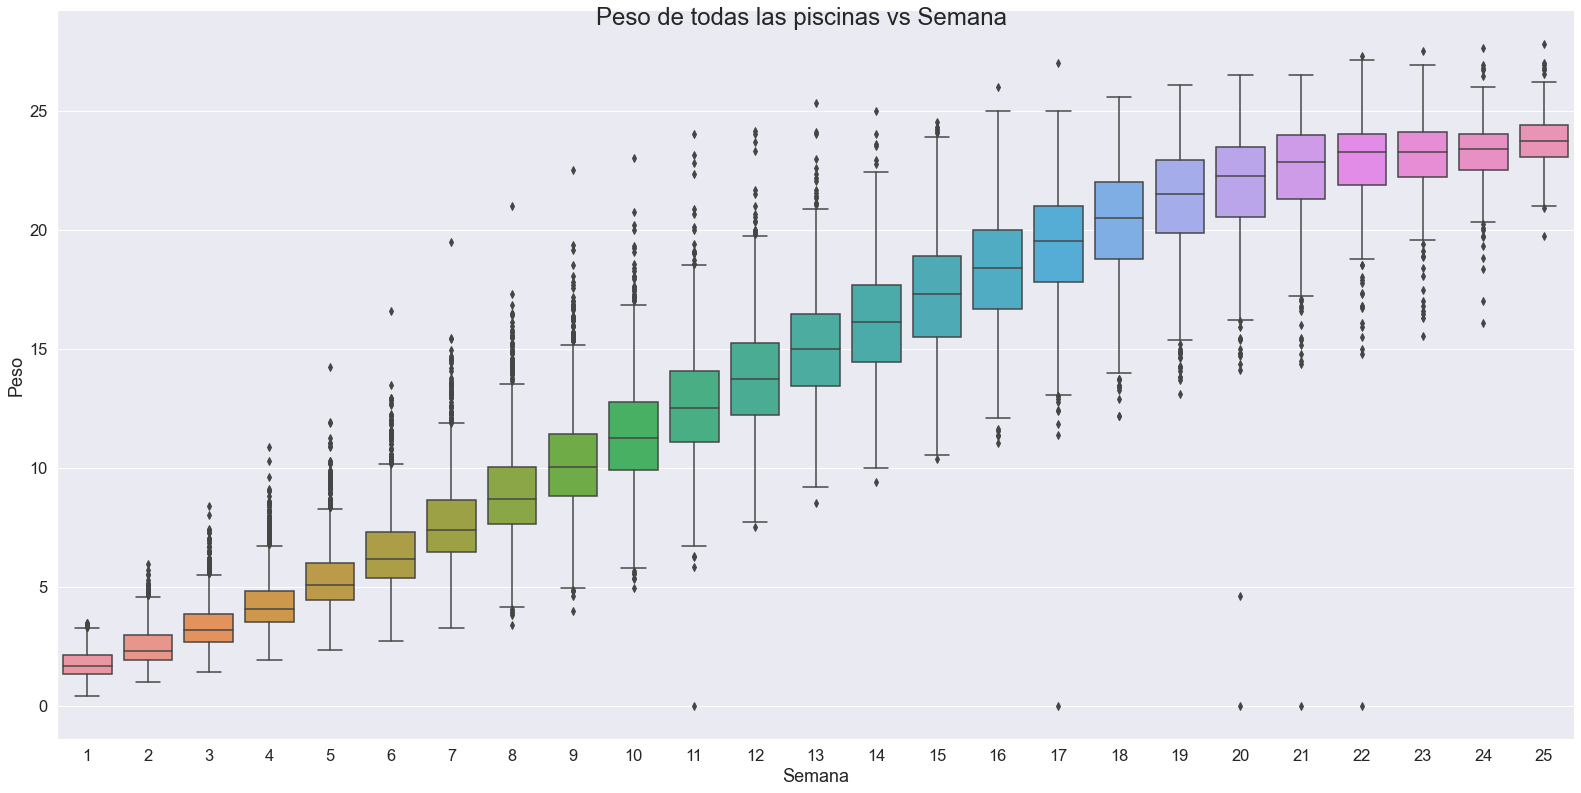

In [56]:
sbn.set(font_scale = 1.5)

box_plot = sbn.catplot(x='Semana', y='Peso', data=df.reset_index(), kind="box", height=11, aspect=2, legend=True)

box_plot.fig.suptitle("Peso de todas las piscinas vs Semana",
                  fontsize=24, fontdict={"weight": "bold"})

plt.show()

## Grafica Peso medio de todas las piscinas vs Semana, de todas las campañas restringida

In [135]:
def plot_avg_weight(df, color_hex, title, label):
    plt.plot(df.groupby('Semana')['Peso'].agg(['mean']), 'o-', color = color_hex, label = label)

    plt.errorbar(x = df['Semana'].unique(), y = df.groupby('Semana')['Peso'].agg(['mean']).values, yerr = df.groupby('Semana')['Peso'].agg(['std'])['std'].values, color = color_hex, linestyle='None', marker='^', label = 'Desviación')

    plt.xticks(range(math.floor(min(df['Semana']) - 1), math.ceil(max(df['Semana'])) + 1))

    plt.xlabel('Semana')

    plt.yticks(np.arange(0, 28))

    plt.ylabel('Peso')

    plt.legend(loc = 'lower right')

    plt.title(title)

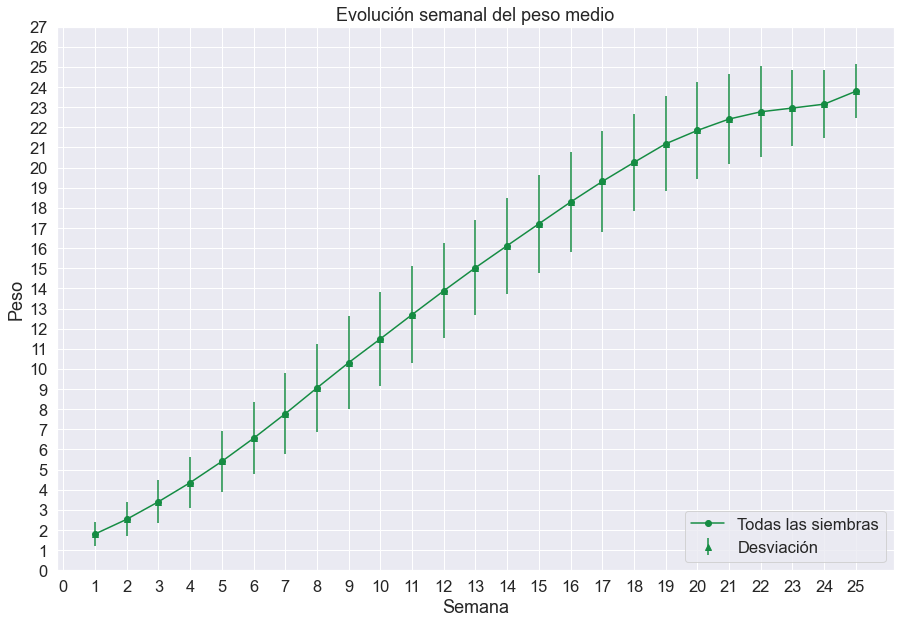

In [136]:
plt.figure(figsize=(15,10)).gca()
plot_avg_weight(df, '#158c43', 'Evolución semanal del peso medio', 'Todas las siembras')
plt.show()

## Grafica Std del Peso de todas las piscinas vs Semana, de todas las campañas restringida

In [137]:
def plot_std_weight(df, color_hex, title, label):
    plt.plot(df.groupby('Semana')['Peso'].agg(['std']), 'o-' ,color = color_hex, label = label)

    plt.xticks(range(math.floor(min(df['Semana']) - 1), math.ceil(max(df['Semana'])) + 1))

    plt.xlabel('Semana')

    plt.yticks(np.arange(0, 3, 0.25))

    plt.ylabel('Std')
    
    plt.legend(loc = 'lower right')

    plt.title(title)

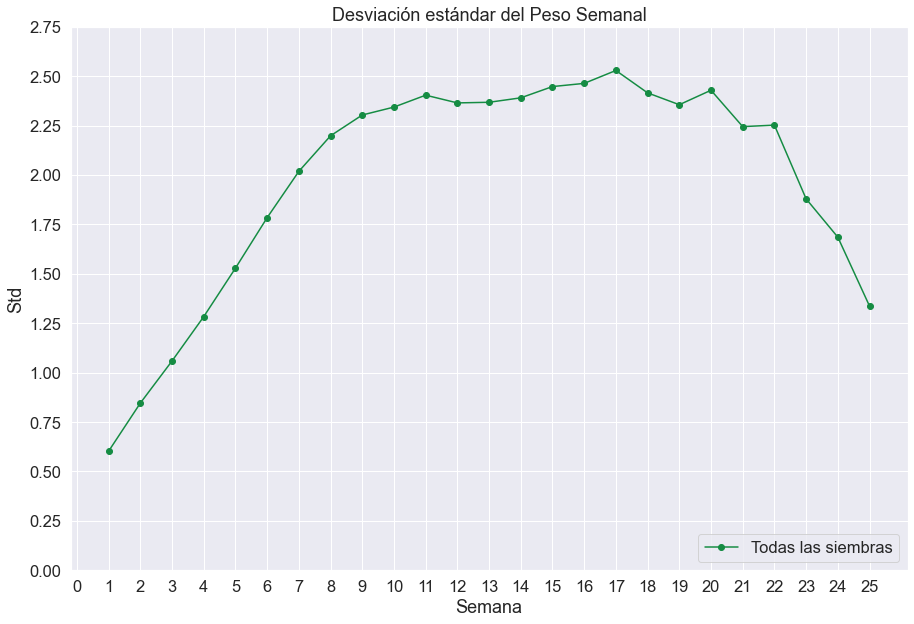

In [138]:
plt.figure(figsize=(15,10)).gca()
plot_std_weight(df, '#158c43', 'Desviación estándar del Peso Semanal', 'Todas las siembras')
plt.show()

## - Por invierno y verano

In [139]:
def determine_season(datetime_as_date):
    year = str(datetime_as_date.year)
    
    seasons = {'winter': pd.date_range(start = year + '-01-01', end = year + '-06-30'),
               'summer': pd.date_range(start = year + '-09-01', end = year + '-12-31')}
    
    if datetime_as_date in seasons['winter']:
        return 1
    elif datetime_as_date in seasons['summer']:
        return 2
    else:
        return 'Fuera del espectro de cultivo'

In [140]:
df['Temporada'] = df['Fecha'].apply(determine_season)
df['Temporada']

0        1
1        1
2        1
3        1
4        1
        ..
21140    1
21141    1
21142    1
21143    1
21144    1
Name: Temporada, Length: 21145, dtype: int64

In [141]:
df['Temporada'][df['Temporada'] == 'Fuera del espectro de cultivo']

Series([], Name: Temporada, dtype: int64)

##  Peso medio

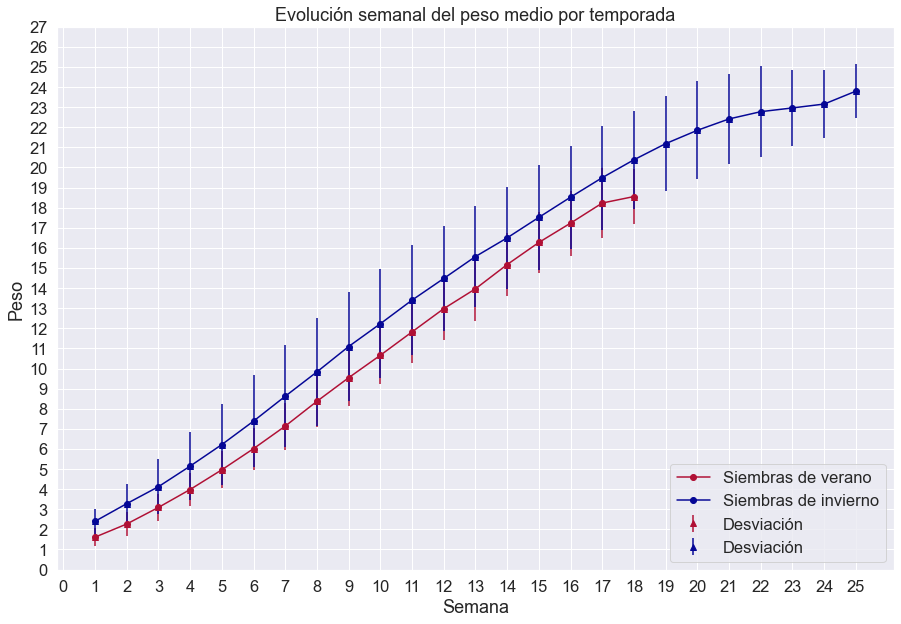

In [117]:
plt.subplots(figsize=(15, 10))
plot_avg_weight(df[df['Temporada'] == 2], '#b01035', 'Evolución semanal del peso medio en VERANO', 'Siembras de verano')
plot_avg_weight(df[df['Temporada'] == 1], '#050796', 'Evolución semanal del peso medio por temporada', 'Siembras de invierno')
plt.show()

## Std del Peso

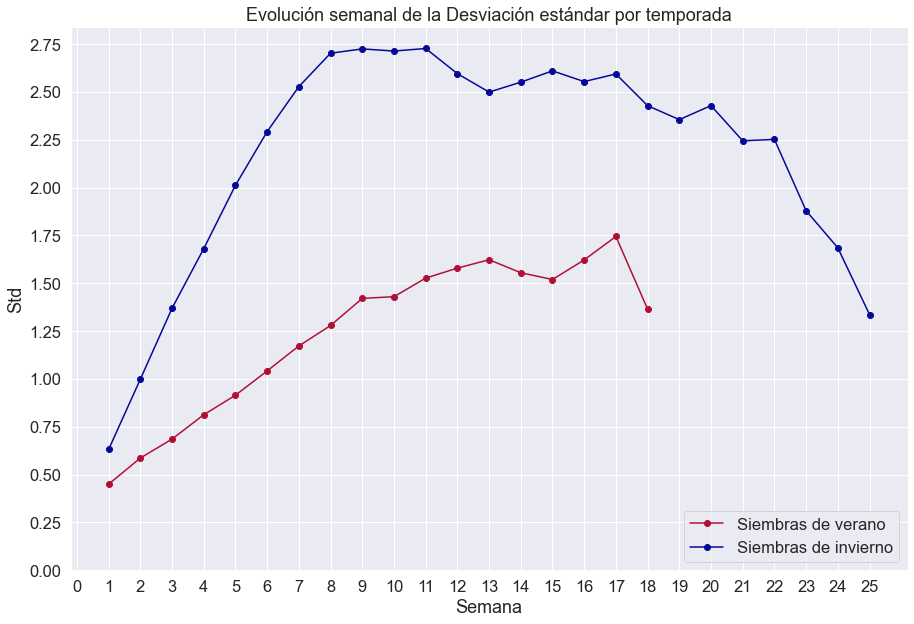

In [121]:
plt.subplots(figsize=(15, 10))
plot_std_weight(df[df['Temporada'] == 2], '#b01035', 'Desviación estándar del Peso Semanal en VERANO', 'Siembras de verano')
plot_std_weight(df[df['Temporada'] == 1], '#050796', 'Evolución semanal de la Desviación estándar por temporada', 'Siembras de invierno')
plt.show()

## Histograma del mes de la semana 1

In [71]:
df['Mes'] = df['Fecha'].apply(lambda x: x.date().month)

In [212]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre',
        'Diciembre']

meses_mapping = {numero : mes for numero, mes in enumerate(meses, 1)}

meses_mapping

{1: 'Enero',
 2: 'Febrero',
 3: 'Marzo',
 4: 'Abril',
 5: 'Mayo',
 6: 'Junio',
 7: 'Julio',
 8: 'Agosto',
 9: 'Septiembre',
 10: 'Octubre',
 11: 'Noviembre',
 12: 'Diciembre'}

In [209]:
df['Mes'] = df['Mes'].map(meses_mapping)

df['Mes'].head()

0    3\nMarzo
1    3\nMarzo
2    3\nMarzo
3    3\nMarzo
4    4\nAbril
Name: Mes, dtype: object

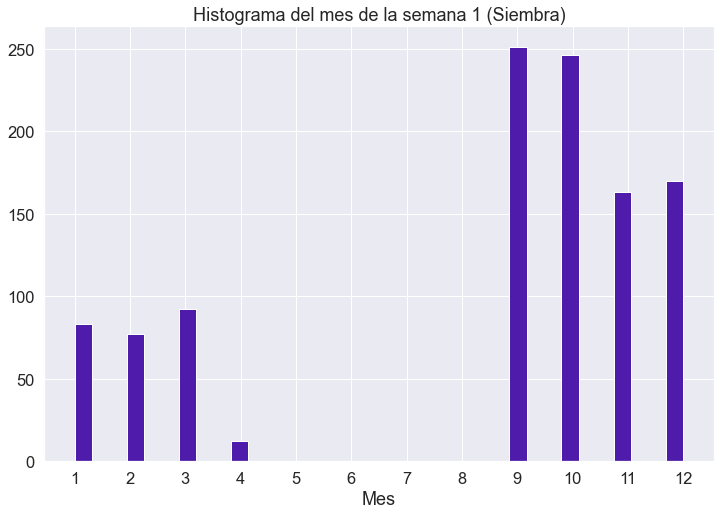

In [72]:
plt.figure(figsize=(12,8)).gca()

plt.hist(df['Mes'][df['Semana'] == 1], bins = 35, color = '#4e1bab')

plt.xticks(range(1, 13))

plt.xlabel('Mes')

plt.title('Histograma del mes de la semana 1 (Siembra)')

plt.show()

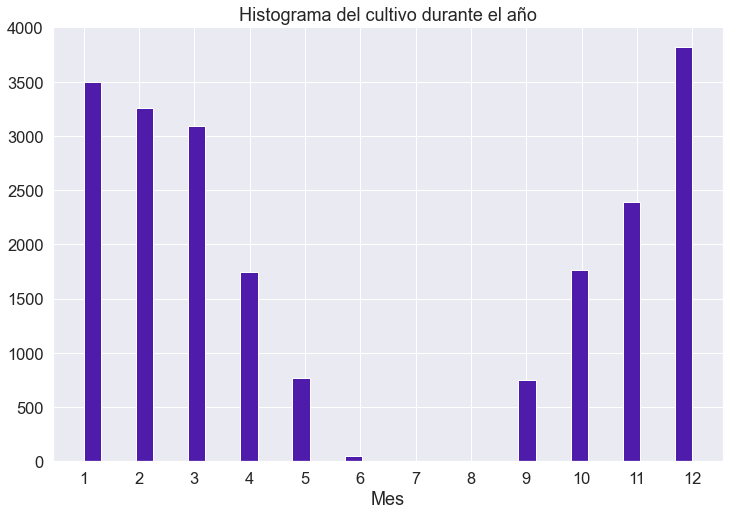

In [73]:
plt.figure(figsize=(12,8)).gca()

plt.hist(df['Mes'], bins = 35, color = '#4e1bab')

plt.xticks(range(1, 13))

plt.xlabel('Mes')

plt.title('Histograma del cultivo durante el año')

plt.show()

Recordando que los langostinos se cultivan alrededor de 4 semanas:

 - "invierno" -> primavera: desde 9 a 12
 - verano -> desde 1 a 6

In [ ]:
s = pd.Series([20, 21, 12],
              index=['London', 'New York', 'Helsinki'])

In [74]:
def subtract_custom_value(custom_value, x):
    return x - custom_value

In [83]:
s.apply(subtract_custom_value, args=(5,))

London      15
New York    16
Helsinki     7
dtype: int64

In [84]:
s

London      20
New York    21
Helsinki    12
dtype: int64